# Importing Necessary Libraries

In [77]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.PURPLE + 'Hello World !' + color.END)

Hello World !


# Importing Dataset

In [108]:
df = pd.read_csv('/content/credit_card.csv')

In [109]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [110]:
for i in df.columns:
    if len(df[i].value_counts()) == df.shape[0]:
        print(i)

CUST_ID


In [111]:
df = df.drop(columns='CUST_ID')

In [112]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Required pre-processing....

In [113]:
df.isna().sum()/df.shape[0]

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [114]:
for i in df.columns:
  print(df[i].value_counts())

0.000000       80
1100.941072     1
40.074484       1
2093.844656     1
179.765708      1
               ..
1139.691004     1
3494.152843     1
2388.503738     1
2153.498372     1
510.233775      1
Name: BALANCE, Length: 8871, dtype: int64
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.400000      10
0.555556      10
0.300000       9
0.200000       9
0.375000       9
0.125000       9
0.285714       8
0.100000       8
0.250000       8
0.444444       7
0.166667       7
0.142857       7
0.600000       6
0.111111       5
0.222222       5
0.428571       5
Name: BALANCE_FREQUENCY, dtyp

In [115]:
df = df[df['MINIMUM_PAYMENTS'].isna()==False]

In [117]:
df = df[df['CREDIT_LIMIT'].isna()==False]

In [118]:
df.isna().sum()/df.shape[0]

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [119]:
for i in df.columns:
  mean = np.mean(df[i])
  std = np.std(df[i])
  print(color.YELLOW,f'mean of the {i} is', mean,color.END)
  print("-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-")
  print("-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-")


 mean of the BALANCE is 1601.2248927435173 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the BALANCE_FREQUENCY is 0.8950351113941721 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the PURCHASES is 1025.433874478929 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the ONEOFF_PURCHASES is 604.9014381658184 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the INSTALLMENTS_PURCHASES is 420.84353288559464 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the CASH_ADVANCE is 994.175523037169 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the PURCHASES_FREQUENCY is 0.4960000002315894 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the ONEOFF_PURCHASES_FREQUENCY is 0.20590874085224864 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the PURCHASES_INSTALLMENTS_FREQUENCY is 0.

In [120]:
from scipy.stats import zscore
zs = zscore(df)

In [121]:
abszs = np.abs(zs)

In [122]:
fltr = (abszs < 3).all(axis=1)

In [123]:
df = df[fltr]

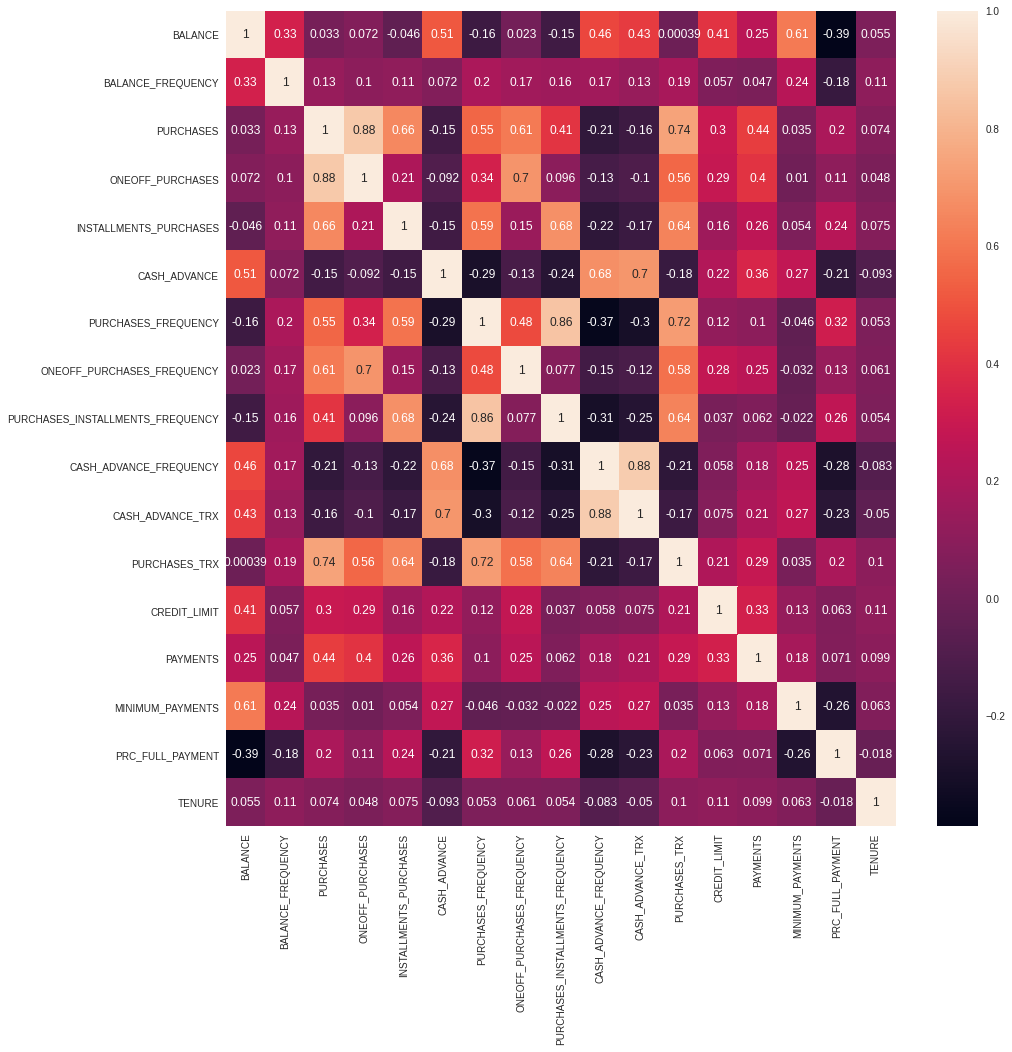

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [125]:
corr_matrix = df.corr().abs()

In [126]:
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.334216,0.033371,0.072304,0.045642,0.512061,0.161497,0.023331,0.151958,0.463626,0.433939,0.000389,0.407711,0.247089,0.613613,0.387944,0.055122
BALANCE_FREQUENCY,0.334216,1.000000,0.132958,0.100776,0.111164,0.072045,0.198702,0.165993,0.156068,0.169555,0.132601,0.191370,0.057086,0.047237,0.238515,0.184645,0.106803
PURCHASES,0.033371,0.132958,1.000000,0.875141,0.655524,0.147285,0.553937,0.610294,0.411823,0.206285,0.164938,0.744189,0.300154,0.441504,0.034681,0.200712,0.073940
ONEOFF_PURCHASES,0.072304,0.100776,0.875141,1.000000,0.208354,0.092000,0.338495,0.695233,0.096322,0.128257,0.101767,0.555588,0.286540,0.404047,0.010063,0.106048,0.047650
INSTALLMENTS_PURCHASES,0.045642,0.111164,0.655524,0.208354,1.000000,0.154393,0.591609,0.148549,0.682321,0.216948,0.174739,0.637402,0.159428,0.261652,0.054256,0.239981,0.074956
CASH_ADVANCE,0.512061,0.072045,0.147285,0.092000,0.154393,1.000000,0.292364,0.125296,0.243169,0.676439,0.698589,0.176680,0.221958,0.358112,0.271131,0.208977,0.092630
PURCHASES_FREQUENCY,0.161497,0.198702,0.553937,0.338495,0.591609,0.292364,1.000000,0.475180,0.855368,0.368035,0.301727,0.720701,0.118337,0.104868,0.045781,0.319554,0.052612
ONEOFF_PURCHASES_FREQUENCY,0.023331,0.165993,0.610294,0.695233,0.148549,0.125296,0.475180,1.000000,0.076673,0.145943,0.121850,0.582840,0.275906,0.251581,0.032090,0.134702,0.061041
PURCHASES_INSTALLMENTS_FREQUENCY,0.151958,0.156068,0.411823,0.096322,0.682321,0.243169,0.855368,0.076673,1.000000,0.306603,0.250991,0.638639,0.037313,0.061921,0.022053,0.264336,0.054095
CASH_ADVANCE_FREQUENCY,0.463626,0.169555,0.206285,0.128257,0.216948,0.676439,0.368035,0.145943,0.306603,1.000000,0.882009,0.214892,0.058015,0.175733,0.248016,0.280879,0.082955


In [127]:
df1 = pd.concat([df.iloc[:,:-1],pd.get_dummies(df['TENURE'],drop_first=False)],axis = 1)

In [128]:
ls = []
for i in corr_matrix.columns:
  n = 0
  for j in corr_matrix[i]:
    if j>.75:
      n += 1
  if n!=0:
    ls.append(i)
if len(ls) == df.shape[1]:
  print('Multicollinearity is present.')

Multicollinearity is present.


In [129]:
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,8,9,10,11,12
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000,0,2,1000.0,201.802084,139.509787,0.000000,0,0,0,0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250,4,0,7000.0,4103.032597,1072.340217,0.222222,0,0,0,0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000,0,12,7500.0,622.066742,627.284787,0.000000,0,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000,0,1,1200.0,678.334763,244.791237,0.000000,0,0,0,0,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000,0,8,1800.0,1400.057770,2407.246035,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125,3,7,500.0,98.225317,113.944625,0.000000,1,0,0,0,0
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000,0,7,1000.0,62.619008,109.580539,0.000000,1,0,0,0,0
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125,3,0,1200.0,150.755024,337.986933,0.000000,1,0,0,0,0
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000,0,6,1000.0,169.249683,124.639905,0.000000,1,0,0,0,0


# Given the data possesses Multicollinearity and a hefty columnar size, Principle Component Analysis is performed.

In [130]:
from sklearn.decomposition import PCA

In [131]:
pcfnc = PCA()

In [132]:
dfpc = pcfnc.fit_transform(df)

In [133]:
pcfnc.explained_variance_ratio_.cumsum()

array([0.57253565, 0.73279235, 0.86135118, 0.93119715, 0.96584603,
       0.98507381, 0.99999273, 0.99999819, 0.99999949, 0.99999995,
       0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [134]:
pcdf = pd.DataFrame(dfpc)[[0,1,2,3,4]]

In [135]:
pcdf

,0,1,2,3,4
0,-3592.262871,-487.914727,-465.035057,181.141334,11.394715
1,4482.038210,4464.542616,420.536696,3454.994618,-1419.937586
2,3279.888330,-826.385703,-1409.981383,-948.000664,183.257249
3,-3107.822438,118.738569,-327.854062,-35.365536,370.108721
4,-1818.057990,1026.561521,755.207108,-1552.505276,853.056898
...,...,...,...,...,...
7185,-3964.459919,-303.223718,-176.413940,-68.764103,-415.028400
7186,-3609.648838,-535.086543,-524.386210,98.492702,-90.407720
7187,-3047.524005,694.103984,-745.726227,306.507526,-561.239822
7188,-3523.088120,-518.787011,-278.337194,-53.175101,-145.143665


# Finally....

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

In [137]:
sse = []
sil = []
dbl = []
chl = []
for i in range(2,10):
    km = KMeans(n_clusters=i,n_init=25,init='k-means++',max_iter=1000,random_state=123).fit(pcdf)
    silsc = silhouette_score(X=df,
                                labels=km.labels_,metric='euclidean',
                                                                  random_state=123)
    dbsc = davies_bouldin_score(X=df,labels=km.labels_)
    chsc = calinski_harabasz_score(X=df,labels=km.labels_)
    c = km.inertia_
    print(color.BOLD,i,color.UNDERLINE,color.END)
    print(color.BOLD,color.PURPLE,'The silhouette score when no.of cluster is',i,'is',silsc,color.END)
    print(color.BOLD,color.CYAN,'The davis_bouldin score when no.of cluster is',i,'is',dbsc,color.END)
    print(color.BOLD,color.YELLOW,'The calinski_harabasz score when no.of cluster is',i,'is',chsc,color.END)
    sse.append(c)
    sil.append(silsc)
    dbl.append(dbsc)
    chl.append(chsc)

 2  
  The silhouette score when no.of cluster is 2 is 0.4443853706579281 
  The davis_bouldin score when no.of cluster is 2 is 1.0949312128685742 
  The calinski_harabasz score when no.of cluster is 2 is 5048.970545963966 
 3  
  The silhouette score when no.of cluster is 3 is 0.43442107490296455 
  The davis_bouldin score when no.of cluster is 3 is 1.3867579070171485 
  The calinski_harabasz score when no.of cluster is 3 is 3667.6084386127964 
 4  
  The silhouette score when no.of cluster is 4 is 0.36038502167543 
  The davis_bouldin score when no.of cluster is 4 is 1.3149333066088817 
  The calinski_harabasz score when no.of cluster is 4 is 3148.6065505542315 
 5  
  The silhouette score when no.of cluster is 5 is 0.3418669932528896 
  The davis_bouldin score when no.of cluster is 5 is 1.282844680380062 
  The calinski_harabasz score when no.of cluster is 5 is 2832.0090045260104 
 6  
  The silhouette score when no.of cluster is 6 is 0.3237055808441254 
  The davis_bouldin score wh

# Using 3 well-known clustering indices the respective plots are crafted.

Text(0, 0.5, 'Inertia')

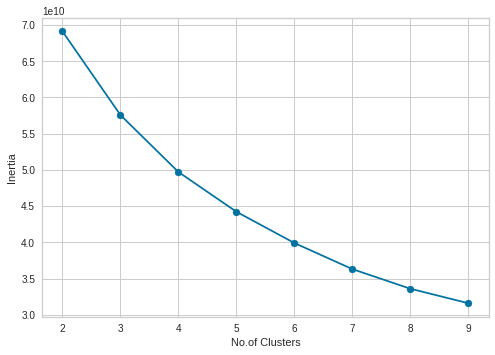

In [138]:
plt.plot(range(2,10),sse)
plt.scatter(range(2,10),sse)
plt.xlabel('No.of Clusters')

plt.ylabel('Inertia')

Text(0, 0.5, 'Calinski-Harabasz Score')

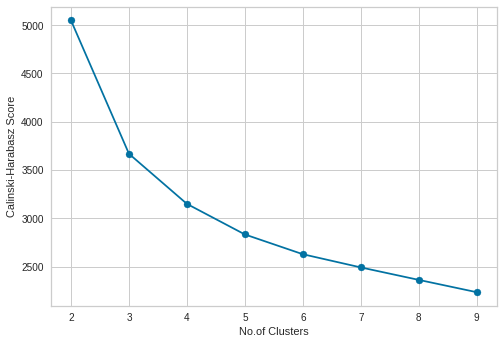

In [139]:
plt.plot(range(2,10),chl)
plt.scatter(range(2,10),chl)
plt.xlabel('No.of Clusters')
plt.ylabel('Calinski-Harabasz Score')

Text(0, 0.5, 'Silhoutee Score')

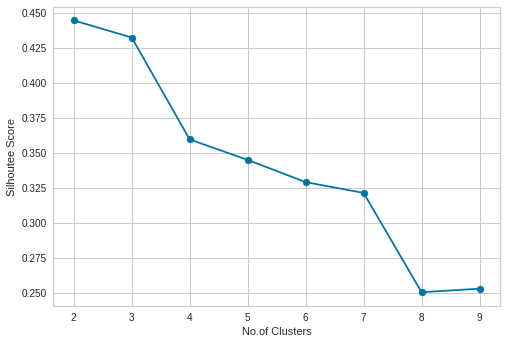

In [ ]:
plt.plot(range(2,10),sil)
plt.scatter(range(2,10),sil)
plt.xlabel('No.of Clusters')
plt.ylabel('Silhoutee Score')

Text(0, 0.5, 'Davis-Bouldin Score')

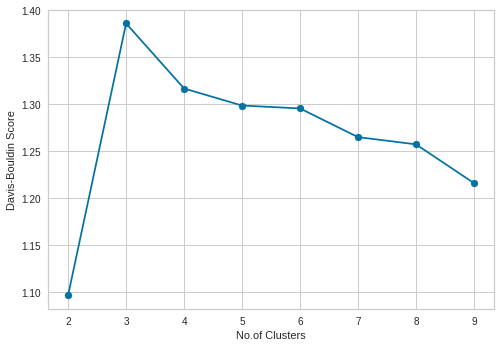

In [ ]:
plt.plot(range(2,10),dbl)
plt.scatter(range(2,10),dbl)
plt.xlabel('No.of Clusters')
plt.ylabel('Davis-Bouldin Score')

# When No. of clusters is 2, Davis-Bouldin Score is the lowest, Silhoutee Score is closest to 1 and Calinski-Harabasz Score is also highest which is preferrable.


In [140]:
km = KMeans(n_clusters=2,n_init=25,init='k-means++',max_iter=3000,random_state=123).fit(pcdf)

In [141]:
df['lab'] = km.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


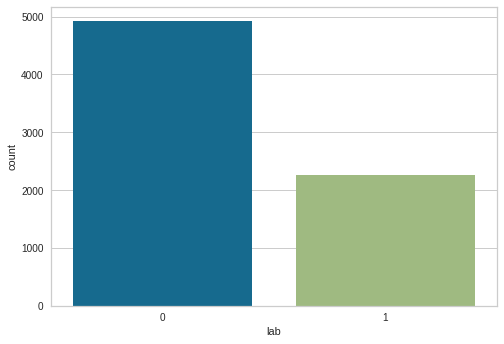

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['lab'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


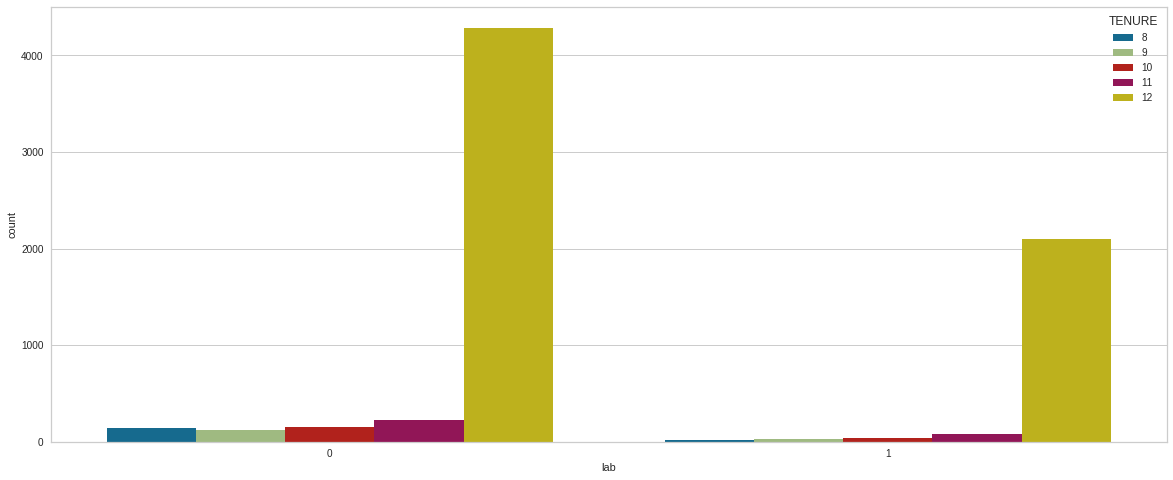

In [143]:
plt.figure(figsize=(20,8))
sns.countplot(df['lab'],hue=df['TENURE'])
#df['lab'].value_counts().plot(kind='bar')

In [144]:
dfin = df.drop(columns=['lab'])

In [145]:
vslzr = SilhouetteVisualizer(model = km, colors = 'yellowbrick')

# Hence, among a list of 'k' values, '2'  is determined to be with the most no. of datapoints that crosses the avg. silhoutte score in each cluster. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f209c4d4d50>,
                     model=None)

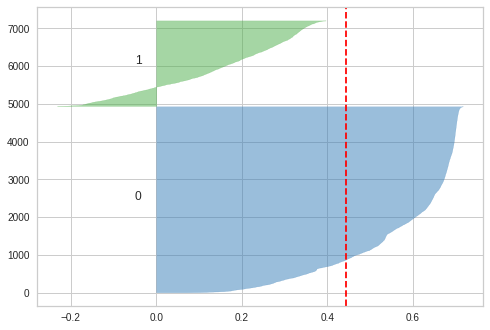

In [146]:
vslzr.fit(df)